In [ ]:

import json
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Example file paths
image_path = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.jpg")
json_path  = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.json")

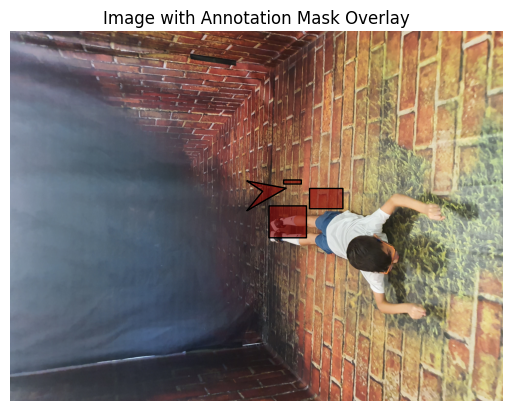

In [5]:
# Assume image_path and json_path are defined externally
# Load annotations
with open(json_path, 'r') as f:
    annotations = json.load(f)

# Load image and get size
img = Image.open(image_path).convert('RGB')
width, height = img.size

# Generate mask
mask = annotation_to_mask((width, height), annotations)

# Create overlay color for mask areas only
cmap = plt.get_cmap('jet')
overlay = np.zeros((height, width, 4))
overlay[mask] = cmap(1.0)       # RGBA color at mask=True
overlay[mask, 3] = 0.6           # alpha for mask areas

# Plot image with mask overlay and bold outline
fig, ax = plt.subplots()
ax.imshow(img)
ax.imshow(overlay, extent=(0, width, height, 0))
# Bold contour outline around mask
ax.contour(mask, levels=[0.5], colors='black', linewidths=1)
ax.axis('off')
ax.set_title('Image with Annotation Mask Overlay')
plt.show()
